<a href="https://colab.research.google.com/github/alistechworld/Machine-Learning-Hands-On-Practice-and-Code/blob/main/Day_31_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# PCA: Principal Component Analysis

In [25]:
import numpy as np
import pandas as pd

np.random.seed(23)

# Class 1
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

# Class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

# ✅ Correct way: use pd.concat
df = pd.concat([df, df1], ignore_index=True)

# Shuffle
df = df.sample(40).reset_index(drop=True)

print(df.head())


   feature1  feature2  feature3  target
0 -0.367548 -1.137460 -1.322148       1
1  0.177061 -0.598109  1.226512       0
2  0.420623  0.411620 -0.071324       1
3  1.968435 -0.547788 -0.679418       1
4 -2.506230  0.146960  0.606195       1


In [26]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [27]:
# Step 1 - Apply standard scaling (mean centring)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [28]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [29]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [30]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [31]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

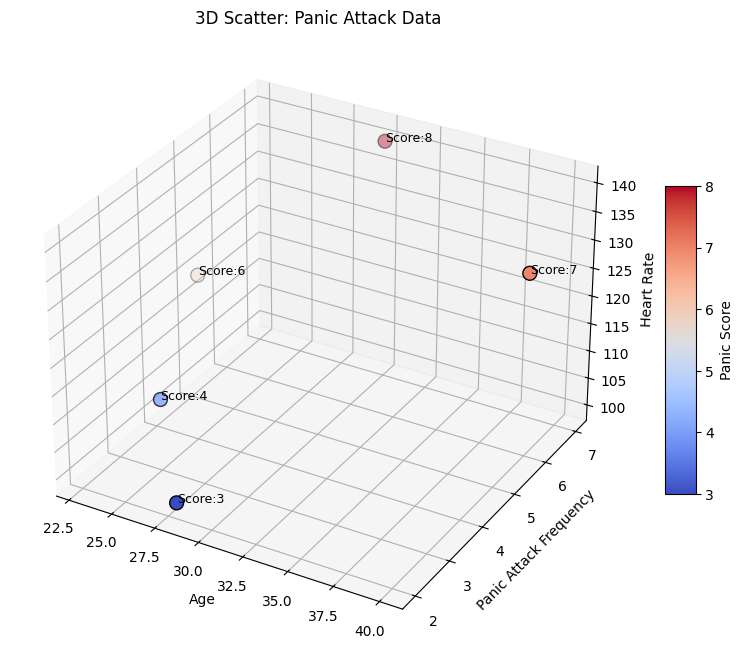

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (apne dataset ka CSV read kar lena)
data = {
    "Age": [23, 25, 30, 28, 40],
    "Panic_Attack_Frequency": [5, 3, 7, 2, 6],
    "Heart_Rate": [120, 110, 140, 100, 130],
    "Panic_Score": [6, 4, 8, 3, 7]
}
df = pd.DataFrame(data)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df["Age"]
y = df["Panic_Attack_Frequency"]
z = df["Heart_Rate"]
c = df["Panic_Score"]

# Scatter plot
sc = ax.scatter(x, y, z, c=c, cmap="coolwarm", s=100, edgecolors="k")

# Labels
ax.set_xlabel("Age")
ax.set_ylabel("Panic Attack Frequency")
ax.set_zlabel("Heart Rate")
ax.set_title("3D Scatter: Panic Attack Data")

# Colorbar
cb = plt.colorbar(sc, shrink=0.5, aspect=10)
cb.set_label("Panic Score")

# ✅ Annotations (safe method: use text3D instead of Annotation3D hack)
for i in range(len(df)):
    ax.text(x[i], y[i], z[i], f"Score:{c[i]}", fontsize=9)

plt.show()


In [33]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [35]:
import numpy as np
import pandas as pd

# Random seed
np.random.seed(23)

# Class 1
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df1 = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 1

# Class 2
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df2 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df2['target'] = 0

# Combine both
df = pd.concat([df1, df2], ignore_index=True)

# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# --- PCA ---
# Covariance matrix
cov_mat = np.cov(df[['feature1','feature2','feature3']].T)

# Eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

# Take top 2 PCs
pc = eigen_vectors[:, 0:2]

# Transform
transformed_df = np.dot(df[['feature1','feature2','feature3']], pc)

# Create new DataFrame
new_df = pd.DataFrame(transformed_df, columns=['PC1','PC2'])
new_df['target'] = df['target'].values

print(new_df.head())


        PC1       PC2  target
0  1.605154 -0.707594       1
1 -0.496582  0.758014       0
2 -0.437420 -0.339738       1
3 -0.510990 -1.857058       1
4  1.097907  2.173715       1


In [36]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()